Сбор и разметка данных (семинары)
ДЗ №9. Инструменты разметки наборов данных

Задание 1.
Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

Датасет:
https://www.kaggle.com/datasets/coltonbarger/rotten-tomatoes-reviews-for-online-streaming-shows

Описание:
Обзоры сайта-агрегатора рецензий Rotten Tomatoes на онлайн-трансляции шоу.

Были собраны данные о 100 самых популярных шоу на 9 потоковых платформах: "Apple TV+", "Paramount+", "HBO MAX", "Disney+", "Prime Video", "Hulu", "Netflix", "Peacock" и "VUDU". Не для всех шоу имеются отзывы о сервисе. Многие шоу остались без отзывов.
На некоторых платформах также отсутствуют 100 шоу из-за их более позднего выхода. Например, это относится к Apple TV+. Кроме того, Rotten Tomatoes, по-видимому, часто находится в состоянии неработоспособности из-за технического обслуживания. Это существенно повлияло на сбор отзывов, и нет гарантии, что все отзывы были собраны.

Файл с отзывами критиков: critic_reviews.csv
Столбцы:
Show - название рецензируемого шоу,
Sentiment - оценка критика (1 для положительной, 0 для отрицательной),
Review - текст обзора.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [ ]:
reviews = pd.read_csv("/content/sample_data/hw_9/critic_reviews.csv", engine='python', encoding='utf-8', on_bad_lines="skip", encoding_errors="ignore")
reviews.head()

,Show,Sentiment,Review
0,Mare of Easttown,1,I’m not sure I have engaged in appointment vie...
1,Mare of Easttown,1,Kate is marvelous; she truly is Mare. She disa...
2,Mare of Easttown,1,That’s the thing I’ve loved most about Mare: t...
3,Mare of Easttown,1,"Boasting Kate Winslet in the title role, twist..."
4,Mare of Easttown,1,"Performances in which madness, psychopathy or ..."


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14791 entries, 0 to 14790
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       14791 non-null  object
 1   Sentiment  14791 non-null  int64 
 2   Review     14790 non-null  object
dtypes: int64(1), object(2)
memory usage: 346.8+ KB


<Axes: >

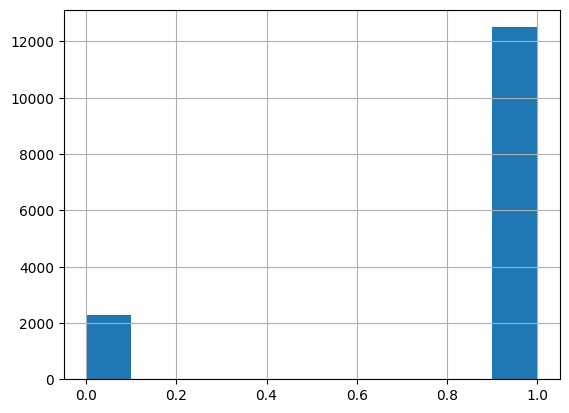

In [ ]:
reviews['Sentiment'].hist()

Задание 2.
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

In [ ]:
# Размеченное и НЕразмеченное подмножества данных
reviews = shuffle(reviews)
labeled_reviews, unlabeled_reviews = train_test_split(reviews, train_size=0.5, random_state=42)
labeled_reviews

,Show,Sentiment,Review
5864,30 Coins,1,"It can be, at times, quite intriguing and even..."
4943,Naomi,1,"Pilots are a tricky thing. Often, they either ..."
2027,Players,1,If you liked American Vandal (is there anyone ...
9665,Only Murders in the Building,1,There is so much to love here. Our trio contin...
9793,Normal People,1,Normal People is not the second coming of Daws...
...,...,...,...
12226,Russian Doll,1,"I never thought this season would be possible,..."
4611,Veep,1,Veep should be remembered as one of the best e...
7435,The Wonder Years,1,"Thankfully, this version of ""The Wonder Years""..."
14398,Joe vs Carole,1,Just when you think TV has nowhere to go with ...


In [ ]:
labeled_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7395 entries, 5864 to 860
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       7395 non-null   object
 1   Sentiment  7395 non-null   int64 
 2   Review     7395 non-null   object
dtypes: int64(1), object(2)
memory usage: 231.1+ KB


In [ ]:
# Обучение модели на размеченных данных
def train_model(labeled_data):
    vect = TfidfVectorizer()
    x = vect.fit_transform(labeled_data['Review'])
    y = labeled_data['Sentiment']
    model = LogisticRegression()
    model.fit(x,y)
    return model, vect

model, vect = train_model(labeled_reviews)

In [ ]:
unlabeled_reviews = unlabeled_reviews.dropna()
unlabeled_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7395 entries, 9744 to 590
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       7395 non-null   object
 1   Sentiment  7395 non-null   int64 
 2   Review     7395 non-null   object
dtypes: int64(1), object(2)
memory usage: 231.1+ KB


In [ ]:
x_unlabeled = vect.transform(unlabeled_reviews['Review'])
y_unlabeled_predicted = model.predict(x_unlabeled)
y_unlabeled_proba = model.predict_proba(x_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)
uncertainty

array([0.41932042, 0.43893177, 0.55662132, ..., 0.3249837 , 0.54952043,
       0.50203097])

In [ ]:
# Выбираем 100 самых неопределенных точек данных, разметку которых нужно выполнить вручную
labeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[:100]]
unlabeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[100:]]
labeled_reviews_new

,Show,Sentiment,Review
4959,The Sex Lives of College Girls,1,"It's fun, funny and flirtatious."
12391,Bridgerton,1,"Still beautiful, still fun and still excellent."
8818,You,1,You season three still remains television wort...
11201,Ramy,1,Ramy is still very funny and is as smart and e...
2951,We Own This City,1,If you're a fan of The Wire (as I am) and cons...
...,...,...,...
1837,Yellowjackets,1,Yellowjackets is the best new television show ...
101,Loot,1,Makes you fall in love with their flawed chara...
2139,For Heaven's Sake,1,"As true-crime, it's an intriguing cottage-coun..."
12675,The Queen's Gambit,1,When coupled with its earnest and talented cas...


Задача 3.
Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

In [ ]:
# Cохранение данных для ручной разметки
labeled_reviews_new.to_csv("part_reviews.csv", index=False)


In [ ]:
# Загрузка данных после ручной разметки
labeled_reviews_new = pd.read_csv("part_reviews.csv", engine="python", encoding="utf-8", on_bad_lines="skip", encoding_errors="ignore")

In [ ]:
labeled_reviews_new

,Show,Sentiment,Review
0,The Sex Lives of College Girls,1,"It's fun, funny and flirtatious."
1,Bridgerton,1,"Still beautiful, still fun and still excellent."
2,You,1,You season three still remains television wort...
3,Ramy,1,Ramy is still very funny and is as smart and e...
4,We Own This City,1,If you're a fan of The Wire (as I am) and cons...
...,...,...,...
95,Yellowjackets,1,Yellowjackets is the best new television show ...
96,Loot,1,Makes you fall in love with their flawed chara...
97,For Heaven's Sake,1,"As true-crime, it's an intriguing cottage-coun..."
98,The Queen's Gambit,1,When coupled with its earnest and talented cas...


Задача 4.
Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

In [ ]:
labeled_reviews_united = pd.concat([labeled_reviews, labeled_reviews_new])
labeled_reviews_united

,Show,Sentiment,Review
5864,30 Coins,1,"It can be, at times, quite intriguing and even..."
4943,Naomi,1,"Pilots are a tricky thing. Often, they either ..."
2027,Players,1,If you liked American Vandal (is there anyone ...
9665,Only Murders in the Building,1,There is so much to love here. Our trio contin...
9793,Normal People,1,Normal People is not the second coming of Daws...
...,...,...,...
95,Yellowjackets,1,Yellowjackets is the best new television show ...
96,Loot,1,Makes you fall in love with their flawed chara...
97,For Heaven's Sake,1,"As true-crime, it's an intriguing cottage-coun..."
98,The Queen's Gambit,1,When coupled with its earnest and talented cas...


Задача 5.
Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

In [ ]:
model, vect = train_model(labeled_reviews_united)
reviews_test = unlabeled_reviews
reviews_test


,Show,Sentiment,Review
9744,Normal People,1,No doubt some will accuse Normal People of wal...
2400,Star Trek: Prodigy,1,"For those who have never heard of Starfleet, (..."
1283,Losing Alice,0,Director and writer Sigal Avin so belabors the...
8023,Breaking Bad,1,Breaking Bad is still a perfect model of filme...
9583,Mad Men,1,"Mad Men smashes history, desires, dreams, and ..."
...,...,...,...
7872,The Summer I Turned Pretty,1,It is sunshine packed in a cinnamon roll for a...
2771,Westworld,1,It has not lost its intelligence or quality. I...
10340,Homeland,1,"Taking plenty of dramatic license, Homeland ha..."
13793,Parks and Recreation,1,The Parks and Rec special was a lot of fun as ...


In [ ]:
x_test = vect.transform(reviews_test['Review'])
y_test_predicted = model.predict(x_test)
y_test_predicted

array([1, 1, 1, ..., 1, 1, 1])

Задача 6.
Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [21]:
f1 = f1_score(reviews_test['Sentiment'], y_test_predicted)
f1

0.9186293932056643